Train

In [ ]:
!python ../../dump_dataset.py -o 5000 -c 110 -j 14

Test

In [14]:
!python ../../dump_dataset.py -o 1000 -c 70 -j 8

Set random seed to 8
100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 31.92it/s]


In [ ]:
import tensorflow as tf

# Ruta al archivo TFRecord
file_path = 'sr_30/train_9_sr_30.tfrecord'

# Crear un dataset a partir del archivo TFRecord
raw_dataset = tf.data.TFRecordDataset(file_path)

# Función para parsear los ejemplos
# Función para parsear los ejemplos
def _parse_function(proto):
    # Especificar las características que esperas en el archivo TFRecord
    feature_description = {
        'inputs': tf.io.VarLenFeature(tf.float32),
        'sat': tf.io.VarLenFeature(tf.float32),
        'policy': tf.io.VarLenFeature(tf.float32),
    }
    parsed_features = tf.io.parse_single_example(proto, feature_description)
    # Convertir las características sparse a dense
    inputs = tf.sparse.to_dense(parsed_features['inputs'])
    sat = tf.sparse.to_dense(parsed_features['sat'])
    policy = tf.sparse.to_dense(parsed_features['policy'])
    return {'inputs': inputs, 'sat': sat, 'policy': policy}

# Aplicar la función de parseo al dataset
parsed_dataset = raw_dataset.map(_parse_function)

# Mostrar los primeros ejemplos del dataset
for raw_record in parsed_dataset.take(5):
    print(raw_record)

In [ ]:
!tar -czvf neuroheurtf2_exp2.tar.gz ../../../neuroheurtf2

In [ ]:
!python ../../neurosat_tpu_tf2.py \
    --use_tpu=False \
    --train_file=sr_70/train_12_sr_70.tfrecord \
    --test_file=sr_70/test_8_sr_70.tfrecord \
    --train_steps=5000 \
    --test_steps=250 \
    --model_dir=model_sr_70 \
    --export_dir=export_sr_70 \
    --variable_number=70 \
    --clause_number=140 \
    --train_files_gzipped=False \
    --batch_size=64 \
    --export_model \
    --attention=True

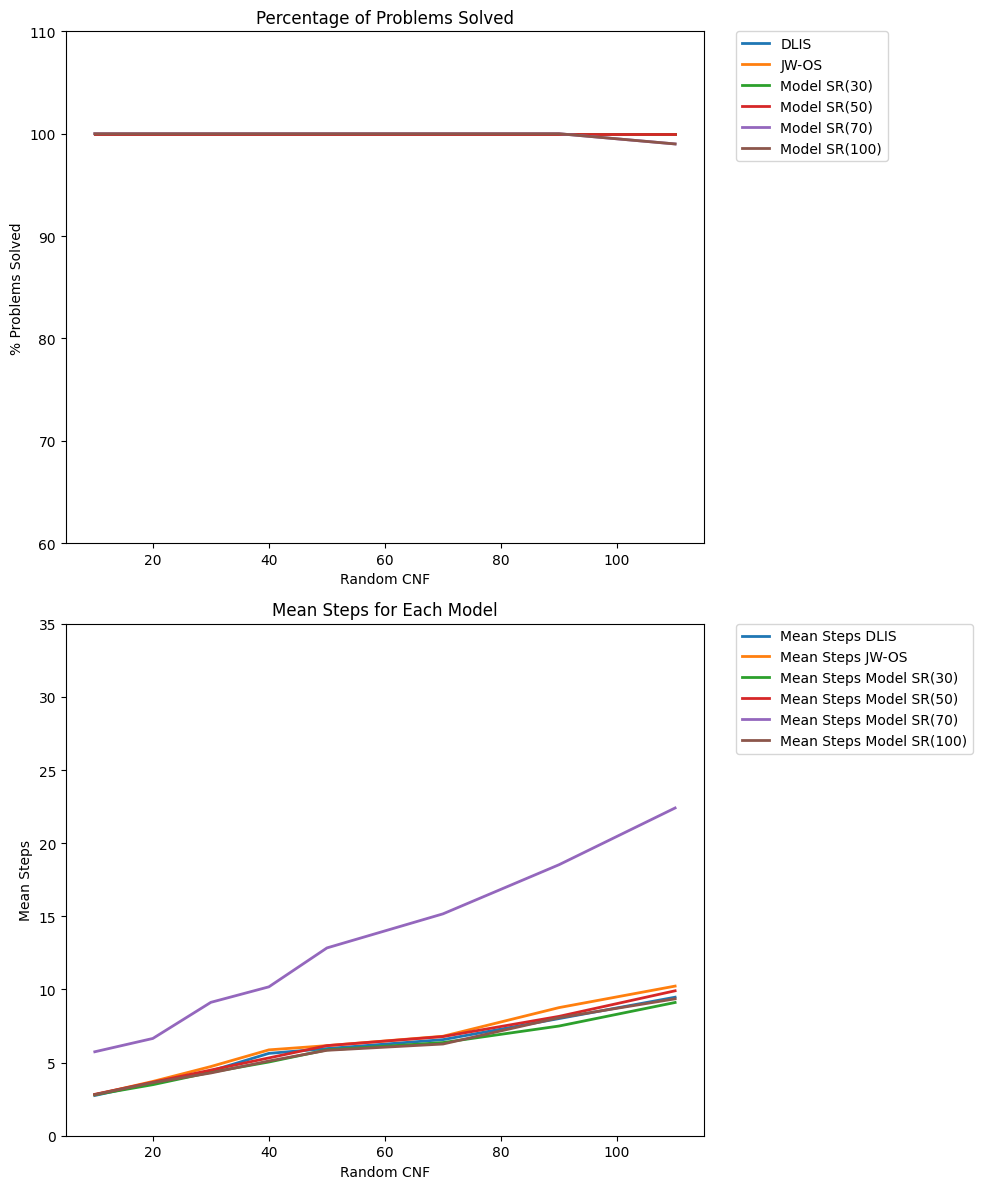

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

SR = [10, 20, 30, 40, 50, 70, 90, 110]

# Datos para % de problemas resueltos
data = {
    'DLIS': [100, 100, 100, 100, 100, 100, 100, 100],
    'JW-OS': [100, 100, 100, 100, 100, 100, 100, 100],
    'Model SR(30)': [100, 100, 100, 100, 100, 100, 100, 100],
    'Model SR(50)': [100, 100, 100, 100, 100, 100, 100, 100],
    'Model SR(70)': [100, 100, 100, 100, 100, 100, 100, 99],
    'Model SR(100)': [100, 100, 100, 100, 100, 100, 100, 99],
}

# Crear DataFrame
df = pd.DataFrame(data)

mean = [
    [2.75, 3.62, 4.43, 5.63, 5.96, 6.57, 8.01, 9.47],  # DLIS
    [2.80, 3.71, 4.73, 5.87, 6.16, 6.80, 8.76, 10.23],  # JW-OS
    [2.80, 3.49, 4.34, 5.04, 5.87, 6.37, 7.50, 9.11],  # Model SR(30)
    [2.83, 3.66, 4.49, 5.32, 6.16, 6.78, 8.16, 9.91],  # Model SR(50)
    [5.74, 6.65, 9.12, 10.18, 12.84, 15.17, 18.53, 22.41], # Model SR(70)
    [2.81, 3.63,  4.29, 5.11, 5.84, 6.27, 8.07, 9.36]  # Model SR(100)
]


# Agregar columnas de media al DataFrame
for i, column in enumerate(df.columns):
    df[f'Mean Steps {column}'] = mean[i]

# Configuración del gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
index = np.arange(len(SR))

# Graficar líneas en ax1 para % Problems Solved
for i, column in enumerate(df.columns[:6]):  # Las primeras 6 son modelos
    ax1.plot(SR, df[column], linewidth=2, label=column)

# Configuración de ax1
ax1.set_xlabel('Random CNF')
ax1.set_ylabel('% Problems Solved')
ax1.set_ylim(60, 110)
ax1.set_title('Percentage of Problems Solved')
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Graficar líneas en ax2 para Mean Steps
for i, column in enumerate(df.columns[:6]):  # Las primeras 6 son modelos
    ax2.plot(SR, df[f'Mean Steps {column}'], linewidth=2, label=f'Mean Steps {column}')

# Configuración de ax2
ax2.set_xlabel('Random CNF')
ax2.set_ylabel('Mean Steps')
ax2.set_ylim(0, 35)
ax2.set_title('Mean Steps for Each Model')
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()
